In [64]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

## Lecture 20 ##

### Sample Mean

In [65]:
chi = Table.read_table('chicago_salary_2021.csv')
chi = chi.where("Annual Salary", are.above(0)).drop("Full or Part-Time","Hourly Rate", "Typical Hours")

In [66]:
# Who is making the most money
chi.sort('Annual Salary', descending=True).show(5)

Name,Job Titles,Department,Salary or Hourly,Annual Salary
"RHEE, JAMIE L",COMMISSIONER OF AVIATION,AVIATION,Salary,275004
"BROWN, DAVID O",SUPERINTENDENT OF POLICE,POLICE,Salary,260004
"FORD II, RICHARD C",FIRE COMMISSIONER,FIRE,Salary,217728
"LIGHTFOOT, LORI E",MAYOR,MAYOR'S OFFICE,Salary,216210
"NANCE HOLT, ANNETTE M",FIRST DEPUTY FIRE COMMISSIONER,FIRE,Salary,197736


In [67]:
# Who is making the least money
chi.sort('Annual Salary', descending=False).show(5)

Name,Job Titles,Department,Salary or Hourly,Annual Salary
"MORRIS, VERNICA R",ALDERMANIC AIDE,CITY COUNCIL,Salary,20400
"ADELMAN, BRUCE E",LEGISLATIVE AIDE,CITY COUNCIL,Salary,20568
"MUNOZ, MAYRA L",LEGISLATIVE AIDE,CITY COUNCIL,Salary,21840
"BURKS, BRITTANY S",ALDERMANIC AIDE,CITY COUNCIL,Salary,22800
"DUKES, DOROTHY L",COMMITTEE SECRETARY,CITY COUNCIL,Salary,25848


In [68]:
pop_mean = np.average(chi.column('Annual Salary'))
pop_mean

92413.14115486832

In [69]:
our_sample = chi.sample(300, with_replacement=False)
our_sample.show(5)

Name,Job Titles,Department,Salary or Hourly,Annual Salary
"WHITE, DEVIN J",FIREFIGHTER-EMT,FIRE,Salary,101874
"BROWN, ALTON",POLICE OFFICER,POLICE,Salary,96060
"ALONZO, CHRISTOPHER B",FIREFIGHTER/PARAMEDIC,FIRE,Salary,100764
"VILENCHIK, DINA",SENIOR PROGRAMMER/ANALYST,BUSINESS AFFAIRS,Salary,119712
"PIPER, LIONEL H",POLICE OFFICER,POLICE,Salary,93354


In [70]:
np.average(our_sample.column('Annual Salary'))

91945.156

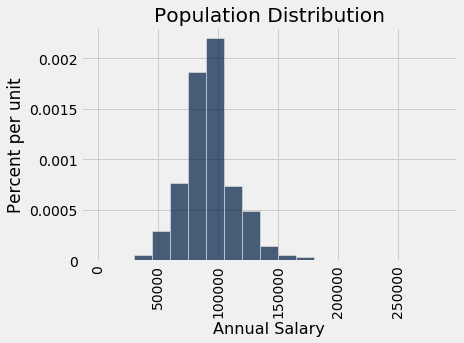

In [71]:
chi_bins = np.arange(0, 300000, 15000)
chi.hist('Annual Salary', bins=chi_bins)
plots.title('Population Distribution');

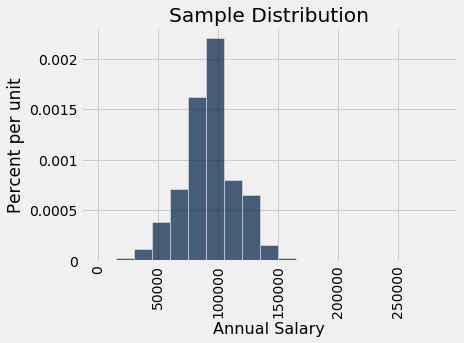

In [72]:
our_sample.hist('Annual Salary', bins=chi_bins)
plots.title('Sample Distribution');

# Variability of the Estimate

In [73]:
def generate_sample_mean(samp_size):
    our_sample = chi.sample(samp_size, with_replacement=False)
    return np.average(our_sample.column('Annual Salary'))

In [74]:
sample_mean = generate_sample_mean(300)
sample_mean

90855.3468

In [75]:
error = sample_mean - pop_mean
error

-1557.7943548683252

# Quantifying Uncertainty

In [76]:
sample_means = make_array()

for i in np.arange(1000):
    new_mean = generate_sample_mean(100)
    sample_means = np.append(sample_means, new_mean)

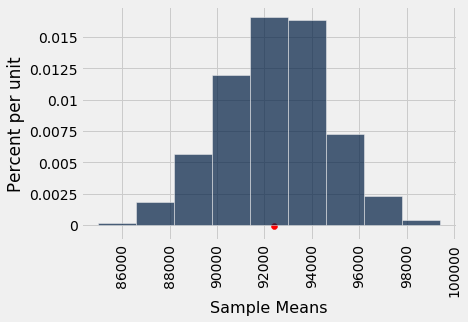

In [77]:
mean_bins = np.arange(85000, 100500, 1600)
Table().with_column(
    'Sample Means', sample_means
).hist(bins = mean_bins)

plots.scatter(pop_mean, -1e-6, color="red");

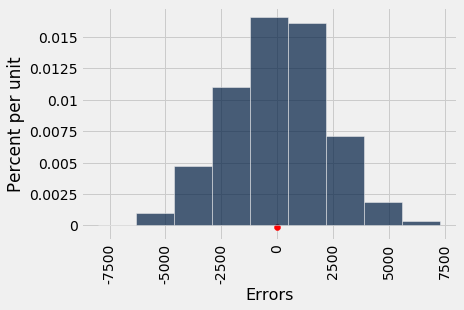

In [78]:
err_bins = np.arange(-8000, 8000, 1700)
Table().with_column(
    'Errors', sample_means - pop_mean
).hist(bins = err_bins)

plots.scatter(0, -1e-6, color="red");

# Bootstrap

Population Mean =        92413.14115486832
Our Sample Mean =        90855.3468
Bootstrap Sample Mean =  91403.14


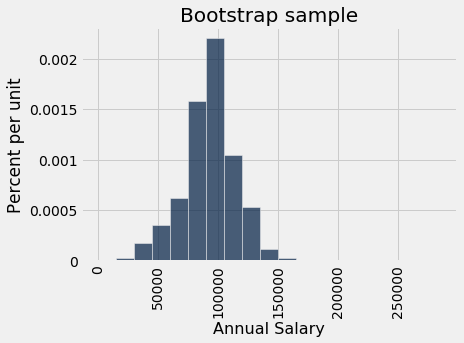

In [79]:
# Take a bootstrap (re)sample of size 300, WITH replacement
boot_sample = our_sample.sample(300, with_replacement=True)
boot_sample.hist('Annual Salary', bins=chi_bins)
plots.title('Bootstrap sample');

print("Population Mean =       ", pop_mean)
print("Our Sample Mean =       ", sample_mean)
print("Bootstrap Sample Mean = ", 
      np.average(boot_sample.column('Annual Salary')))

In [80]:
def one_bootstrap_mean():
    boot_resample = our_sample.sample()
    return np.average(boot_resample.column('Annual Salary'))

In [81]:
bootstrap_means = make_array()
for i in np.arange(1000):
    new_mean = one_bootstrap_mean()
    bootstrap_means = np.append(bootstrap_means, new_mean)

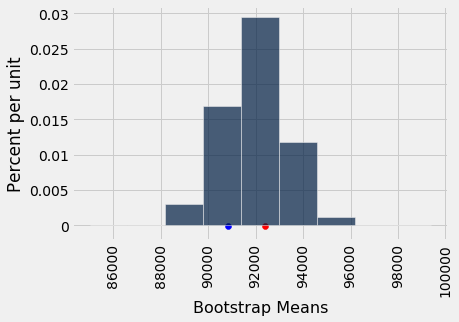

In [82]:
Table().with_column(
    'Bootstrap Means', bootstrap_means
).hist('Bootstrap Means', bins=mean_bins)

plots.scatter(pop_mean, -1e-6, color="red");
plots.scatter(sample_mean, -1e-6, color="blue");

## Confidence Intervals

The confidence interval is an interval based on the middle 95% of bootstrap samples.  The interval will be shown in yellow, the sample median (our estimate) in blue, and the true population median (the parameter) in red.

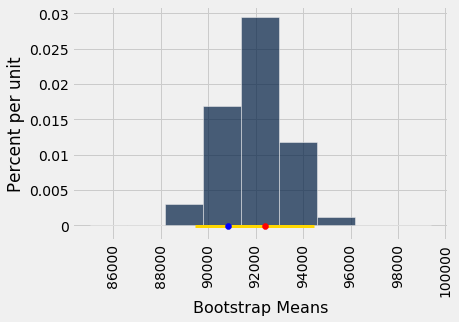

In [83]:
left = percentile(2.5, bootstrap_means)
right = percentile(97.5, bootstrap_means)

Table().with_column(
    'Bootstrap Means', bootstrap_means
).hist('Bootstrap Means', bins=mean_bins)

plots.plot([left, right], [-1e-6,-1e-6], color="gold",lw=3, zorder=1);
plots.scatter(pop_mean, -1e-6, color="red", zorder=2);
plots.scatter(sample_mean, -1e-6, color="blue", zorder=2);

## Confidence Interval for the Mean Maternal Age

In [84]:
births = Table.read_table('baby.csv')
births.show(5)

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False


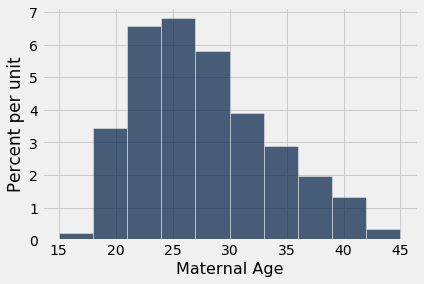

In [85]:
births.hist('Maternal Age')

In [88]:
pop_mean_age = np.mean(births.column('Maternal Age'))
pop_mean_age

27.228279386712096

In [87]:
def one_bootstrap_mean_age():
    return np.mean(births.sample().column('Maternal Age'))

In [89]:
bootstrap_means_age = make_array()

for i in np.arange(1000):
    new_mean_age = one_bootstrap_mean_age()
    bootstrap_means_age = np.append(bootstrap_means_age, new_mean_age)
    
left = percentile(2.5, bootstrap_means_age)
right = percentile(97.5, bootstrap_means_age)

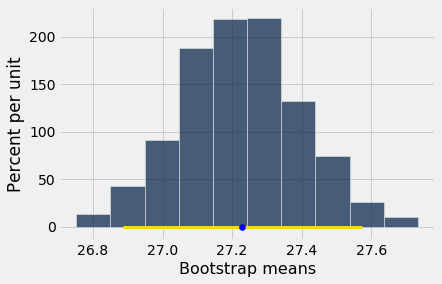

In [91]:
Table().with_column('Bootstrap means', bootstrap_means_age).hist()
plots.plot([left,right], [-1e-4, -1e-4], color="gold", lw=3, zorder=1);
plots.scatter(pop_mean_age, -1e-4, color="blue", zorder=2);

## Average (Mean) ##

In [ ]:
values = make_array(2, 3, 3, 9)

In [ ]:
sum(values)/len(values)

In [ ]:
np.average(values)

In [ ]:
np.mean(values)

In [ ]:
# Add up all values and divide by total number of values
(2 + 3 + 3 + 9)/4

In [ ]:
# Or, multiply each value by its relative frequency
2*(1/4) + 3*(2/4) + 9*(1/4)

In [ ]:
values_table = Table().with_columns('value', values)
values_table

In [ ]:
bins_for_display = np.arange(0.5, 10.6, 1)
values_table.hist(0, bins = bins_for_display)

In [ ]:
## Make array of 10 2s, 20 3s, and 10 9s

new_vals = make_array(2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
                      3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
                      9, 9, 9, 9, 9, 9, 9, 9, 9, 9)

In [ ]:
Table().with_column('value', new_vals).hist(bins = bins_for_display)

In [ ]:
np.average(values)

In [ ]:
np.average(new_vals)

### Discussion Question

In [94]:
nba = Table.read_table('nba_players_19.csv')
nba

first_name,last_name,team,team_abbr,position,number,height
Alex,Abrines,Thunder,OKC,Guard,8,78
Jaylen,Adams,Hawks,ATL,Guard,10,74
Steven,Adams,Thunder,OKC,Center,12,84
Bam,Adebayo,Heat,MIA,Center-Forward,13,82
DeVaughn,Akoon-Purcell,Nuggets,DEN,Guard-Forward,23,78
LaMarcus,Aldridge,Spurs,SAS,Forward,12,83
Rawle,Alkins,Bulls,CHI,Guard,20,77
Grayson,Allen,Jazz,UTA,Guard,24,77
Jarrett,Allen,Nets,BKN,Center,31,83
Al-Farouq,Aminu,Blazers,POR,Forward,8,81


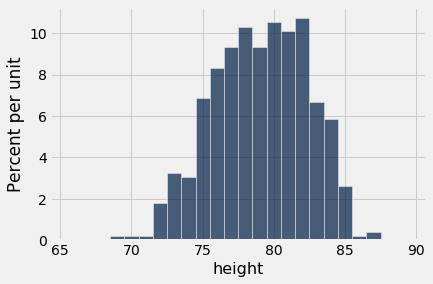

In [96]:
nba.hist('height', bins=np.arange(65.5, 90.5))

In [97]:
heights = nba.column('height')
percentile(50, heights)

79

In [98]:
np.average(heights)

79.05263157894737

## Standard Deviation ##

In [ ]:
sd_table = Table().with_columns('Value', values)
sd_table

In [ ]:
average_value = np.average(sd_table.column(0))
average_value

In [ ]:
deviations = values - average_value
sd_table = sd_table.with_column('Deviation', deviations)
sd_table

In [ ]:
sum(deviations)

In [ ]:
sd_table = sd_table.with_columns('Squared Deviation', deviations ** 2)
sd_table

In [ ]:
# Variance of the data

variance = np.mean(sd_table.column('Squared Deviation'))
variance

In [ ]:
# Standard Deviation (SD) is the square root of the variance

sd = variance ** 0.5
sd

In [ ]:
np.std(values)